# Calculation of the divergence of the advection of the perpendicular gradient of the potential times density using cartesian coordinates

This meant as a check that what is calculated in [divOfVectorAdvectionWithN](divOfVectorAdvectionWithN.ipynb) is correct.

We would here like to calculate
$$
\nabla\cdot\left(\mathbf{u}_E\cdot\nabla\left[n \nabla_\perp\phi \right]\right)
$$
and check that this in fact is equal to
$$
\frac{1}{\rho}\{\phi, \Omega^D\} + \frac{1}{2\rho}\{\mathbf{u}_E\cdot\mathbf{u}_E, n\}
$$

We do so by calculating everything in cartesian coordinates, and then map the result to cylindrical coordinates

In [1]:
from IPython.display import display
from sympy import symbols, simplify, sympify, expand
from sympy import init_printing
from sympy import Eq, Function
from sympy import sin, cos

init_printing()

We start by noting that

$$
\nabla\cdot\left(\mathbf{u}_E\cdot\nabla\left[n \nabla_\perp\phi \right]\right)
=
\nabla_\perp\cdot\left(\mathbf{u}_E\cdot\nabla_\perp\left[n \nabla_\perp\phi \right]\right)
$$

where

$$
\nabla_\perp f = \boldsymbol{\hat{\rho}} \partial_\rho f + \boldsymbol{\hat{\theta}} \frac{1}{\rho}\partial_\theta f
$$

and

\begin{align*}
  \boldsymbol{\hat{\rho}} &= \cos(\theta)\mathbf{\hat{x}} - \sin(\theta)\mathbf{\hat{y}}\\
  \boldsymbol{\hat{\theta}} &= \sin(\theta)\mathbf{\hat{x}} + \cos(\theta)\mathbf{\hat{y}}
\end{align*}


(see for example Appendix in Griffiths for details).

Further, we have that

\begin{align*}
  x =& \rho\cos(\theta) \\
  y =& \rho\sin(\theta)
\end{align*}

which gives

\begin{align*}
  \frac{\partial}{\partial \rho}f(x(\rho,\theta), y(\rho,\theta))
  =&
     \frac{\partial f}{\partial x} \frac{\partial x}{\partial \rho}
   + \frac{\partial f}{\partial y} \frac{\partial y}{\partial \rho}
  =
     \frac{\partial f}{\partial x} \cos(\theta)
   + \frac{\partial f}{\partial y} \sin(\theta)
  \\
  \frac{\partial}{\partial \theta}f(x(\rho,\theta), y(\rho,\theta))
  =&
     \frac{\partial f}{\partial x} \frac{\partial x}{\partial \theta}
   + \frac{\partial f}{\partial y} \frac{\partial y}{\partial \theta}
  =
   - \frac{\partial f}{\partial x}\rho\sin(\theta)
   + \frac{\partial f}{\partial y}\rho\cos(\theta)
\end{align*}

This gives

\begin{align*}
  \nabla_\perp f
  =&
  (\cos(\theta)\mathbf{\hat{x}} - \sin(\theta)\mathbf{\hat{y}}) 
  \partial_\rho 
  f
  + 
  (\sin(\theta)\mathbf{\hat{x}} + \cos(\theta)\mathbf{\hat{y}})
  \frac{1}{\rho}
  \partial_\theta 
  f
  \\
  =&
  (\cos(\theta)\mathbf{\hat{x}} - \sin(\theta)\mathbf{\hat{y}}) 
  \left(
      \cos(\theta)\frac{\partial f}{\partial x}
   +  \sin(\theta)\frac{\partial f}{\partial y}
   \right)
  \\&+ 
  (\sin(\theta)\mathbf{\hat{x}} + \cos(\theta)\mathbf{\hat{y}})
  \frac{1}{\rho}
  \left(
   - \rho\sin(\theta)\frac{\partial f}{\partial x}
   + \rho\cos(\theta)\frac{\partial f}{\partial y}
  \right)
\end{align*}

In [12]:
YOU ARE HERE: Simplify the gradient, and make a function out of it. Scalar quatities should give the same in all coordinate systems

SyntaxError: invalid syntax (<ipython-input-12-0eafdc8f1cdb>, line 1)

Further, we have that

$$
\mathbf{u}_E = \frac{-\nabla_\perp \phi \times \mathbf{\hat{b}}}{B}
= \mathbf{\hat{z}} \times \nabla_\perp \phi 
=
\begin{vmatrix}
    \boldsymbol{\hat{\rho}} & \mathbf{\hat{z}} & \boldsymbol{\hat{\theta}}\\
    0 & 1 & 0\\
    \partial_\rho \phi & 0 & \frac{1}{\rho} \partial_\theta \phi
\end{vmatrix}
=
\frac{1}{\rho}\partial_\theta\phi \boldsymbol{\hat{\rho}} - \partial_\rho\phi \boldsymbol{\hat{\theta}}
$$

where $B$ is normalized to $1$

Notice the left-handedness of the system (due to BOUT++). This gives

$$
\mathbf{u}_E\cdot\nabla_\perp 
= \frac{1}{\rho}\partial_\theta\phi \partial_\rho - \frac{1}{\rho}\partial_\rho\phi \partial_\theta
= \frac{1}{\rho}\{\phi, \cdot\}
$$

We can thus calculate the $\boldsymbol{\hat{\rho}}$ and the $\boldsymbol{\hat{\theta}}$ components of $\mathbf{u}_E\cdot\nabla_\perp\left(n \nabla_\perp\phi \right)$ independently, we will do so in Cartesian coordinates.

This means that the Poisson bracket $\{a,b\}$ can be written in Cartesian coordinates as

\begin{align*}
  \{a,b\}
  =&
  (\partial_\theta a)( \partial_\rho b) - (\partial_\rho a)( \partial_\theta b)\\
  =&
  \left[
   - \rho\sin(\theta) \frac{\partial a}{\partial x} 
   + \rho\cos(\theta) \frac{\partial a}{\partial y} 
  \right]
  \left[
     \cos(\theta) \frac{\partial b}{\partial x} 
   + \sin(\theta) \frac{\partial b}{\partial y} 
  \right]
  - 
  \left[
     \cos(\theta) \frac{\partial a}{\partial x} 
   + \sin(\theta) \frac{\partial a}{\partial y} 
  \right]
  \left[
   - \rho\sin(\theta) \frac{\partial b}{\partial x} 
   + \rho\cos(\theta) \frac{\partial b}{\partial y} 
  \right]
  \\
  =&
  \rho
  \left(
  \left[
   - \sin(\theta) \frac{\partial a}{\partial x} 
   + \cos(\theta) \frac{\partial a}{\partial y} 
  \right]
  \left[
     \cos(\theta) \frac{\partial b}{\partial x} 
   + \sin(\theta) \frac{\partial b}{\partial y} 
  \right]
  - 
  \left[
     \cos(\theta) \frac{\partial a}{\partial x} 
   + \sin(\theta) \frac{\partial a}{\partial y} 
  \right]
  \left[
   - \sin(\theta) \frac{\partial b}{\partial x} 
   + \cos(\theta) \frac{\partial b}{\partial y} 
  \right]
  \right)
\end{align*}

We investigate if this can be simplified

In [6]:
rho, theta = symbols('rho, theta')
x, y = symbols('x, y')
a =  Function('a')(x, y)
b =  Function('b')(x, y)

Native


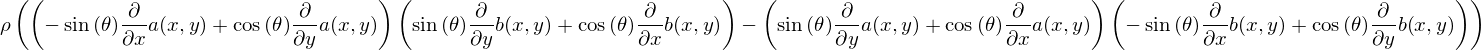

Simplified


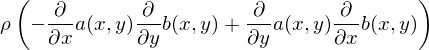

In [11]:
poissonAB =\
rho*\
(\
(\
   - sin(theta)*a.diff(x)\
   + cos(theta)*a.diff(y)\
)*\
(\
     cos(theta)*b.diff(x)\
   + sin(theta)*b.diff(y)\
)\
  -\
(\
     cos(theta)*a.diff(x)\
   + sin(theta)*a.diff(y)\
)*\
(\
   - sin(theta)*b.diff(x)\
   + cos(theta)*b.diff(y)\
)\
)
print("Native")
display(poissonAB)
print("Simplified")
display(poissonAB.simplify())

Not suprisingly, this collapsed to the standard Poisson bracket. Notice that the prefactor $\rho$ which we got from writing $\{a,b\}$ can be written in Cartesian coordinates, cancels $\frac{1}{\rho}$ in front of the Poisson bracket, which we got from the $\mathbf{u}_E\cdot\nabla_\perp$ part.

Let us now calculate $\mathbf{u}_E\cdot\nabla_\perp\left(n \partial_\rho\phi \right)$ and $\mathbf{u}_E\cdot\nabla_\perp\left(n \partial_\rho\phi \right)$ 

In [8]:
n   =  Function('n')(x, y)
phi =  Function('phi')(x, y)

In [9]:
def poisson(a,b):
    """Calculates the Poisson bracket in cartesian coordinates"""
    return a.diff(y)*b.diff(x) - a.diff(x)*b.diff(y)

In [ ]:
vector = (poisson(phi, n*phi.diff))